In [1]:
# Noise models
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Generating noise models
def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    plt.loglog(f, np.abs(np.fft.rfft(s)))

def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);
    
def autocorr(x, M):
     Ryy = np.zeros(M+1) 
     for tau in range(M+1):
        #print x[M:]
        #print x[M-tau:-tau]
         Ryy[tau] = sum( x[M:]*x[M-tau:len(x)-tau] )
     return Ryy

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

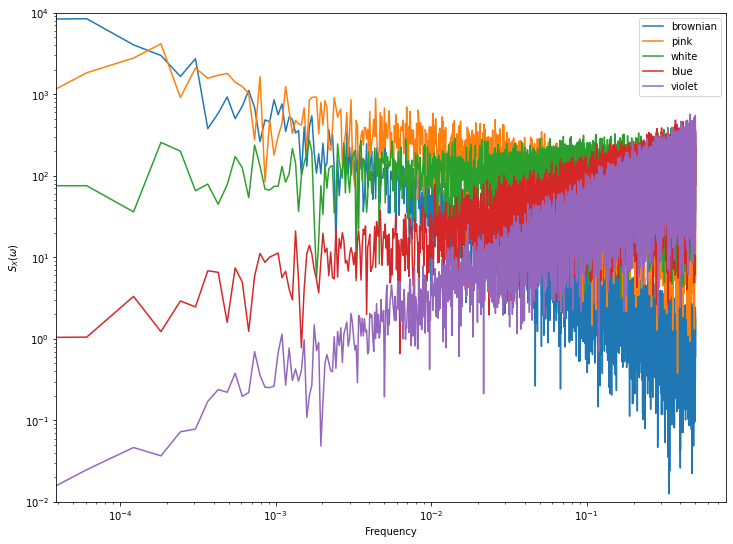

In [3]:
# plotting of Power Spectral Density

plt.figure(figsize=(12, 9))
for G in [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise]:
    plot_spectrum(G(2**14))
plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])
plt.xlabel(" Frequency ")
plt.ylabel("$S_{X}(\omega)$")
plt.ylim([1e-2, 10000]);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


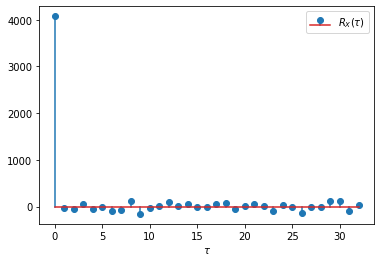

In [4]:
Nsample = 4096
M = 32  # overlaping

# WGN

xi = norm.rvs(scale=1, size=Nsample)
Rx = autocorr(xi, M)
fig = plt.figure()
ax = plt.subplot(111)
ax.stem(range(M+1), Rx, label=r"$R_{X}(\tau)$")
ax.set_xlabel(r"$\tau$")
ax.legend()